In [51]:
#importing the libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
df_DA_USA = df[(df['job_title_short'] == 'Data Analyst') & 
               (df['job_country'] == 'United States')].copy()

df_DA_USA

In [53]:
df_DA_USA['job_posted_month_num'] = df_DA_USA['job_posted_date'].dt.month

In [54]:
df_DA_USA_exp = df_DA_USA.explode('job_skills')


In [55]:
df_DA_USA_pivot = (df_DA_USA_exp.pivot_table
                   (index = 'job_posted_month_num', 
                    columns = 'job_skills', 
                    aggfunc = 'size', 
                    fill_value = 0))

df_DA_USA_pivot.loc['Total'] = df_DA_USA_pivot.sum()

df_DA_USA_pivot = (df_DA_USA_pivot[df_DA_USA_pivot.loc['Total']
                                   .sort_values(ascending = False).index])

df_DA_USA_pivot = df_DA_USA_pivot.drop('Total')

df_DA_USA_pivot

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month_num,,,,,,,,,,,,,,,,,,,,,
1,4601,3592,2488,2254,1832,1513,1337,968,972,718,...,0,0,0,0,0,0,1,1,0,0
2,3168,2587,1676,1618,1212,1045,1122,738,705,514,...,0,0,0,0,0,0,0,0,0,0
3,3226,2661,1804,1683,1238,1141,1054,736,669,418,...,1,0,0,0,0,0,0,0,0,0
4,3220,2549,1789,1679,1302,1038,1057,695,650,439,...,0,0,0,0,0,1,0,0,0,0
5,2581,2118,1432,1349,972,867,860,557,515,358,...,0,0,0,0,0,0,0,0,0,1
6,2862,2382,1628,1609,984,1017,989,721,624,414,...,0,1,0,0,1,0,0,0,0,0
7,2609,2118,1533,1438,996,881,881,587,549,401,...,0,0,0,0,0,0,0,0,0,0
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,...,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,...,0,0,0,0,0,0,0,0,0,0


Change to pct

In [56]:
dA_totals = df_DA_USA.groupby('job_posted_month_num').size()


In [57]:
df_DA_USA_perc = df_DA_USA_pivot.div(dA_totals/100, axis = 0)

In [58]:
# change number into month name
df_DA_USA_perc = df_DA_USA_perc.reset_index()
df_DA_USA_perc['job_posted_month'] = (df_DA_USA_perc['job_posted_month_num']
                                      .apply(lambda x: pd.to_datetime(x, format='%m')
                                             .strftime('%b')))
df_DA_USA_perc = df_DA_USA_perc.set_index('job_posted_month')
df_DA_USA_perc = df_DA_USA_perc.drop(columns='job_posted_month_num')
df_DA_USA_perc

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166,17.812574,15.740523,11.396280,11.443372,8.453026,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011773,0.011773,0.000000,0.000000
Feb,51.730895,42.243632,27.367734,26.420640,19.790986,17.064010,18.321359,12.050947,11.512084,8.393207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,51.881634,42.795111,29.012544,27.066581,19.909939,18.349952,16.950788,11.836603,10.759087,6.722419,...,0.016082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,53.231939,42.139197,29.575136,27.756654,21.524219,17.159861,17.473963,11.489502,10.745578,7.257398,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.000000
May,51.692369,42.419387,28.680152,27.017825,19.467254,17.364310,17.224114,11.155618,10.314440,7.170038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020028
Jun,50.360725,41.914482,28.646841,28.312511,17.314799,17.895478,17.402780,12.686961,10.980116,7.284885,...,0.000000,0.017596,0.000000,0.000000,0.017596,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,50.163430,40.722938,29.475101,27.648529,19.150163,16.939050,16.939050,11.286291,10.555662,7.710056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,51.462165,41.166717,29.409105,30.524570,19.234248,19.158879,18.209225,11.335544,11.245101,7.295749,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,49.471869,38.823022,29.165768,26.492779,18.452253,16.081052,17.676223,10.303945,10.239276,7.738737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


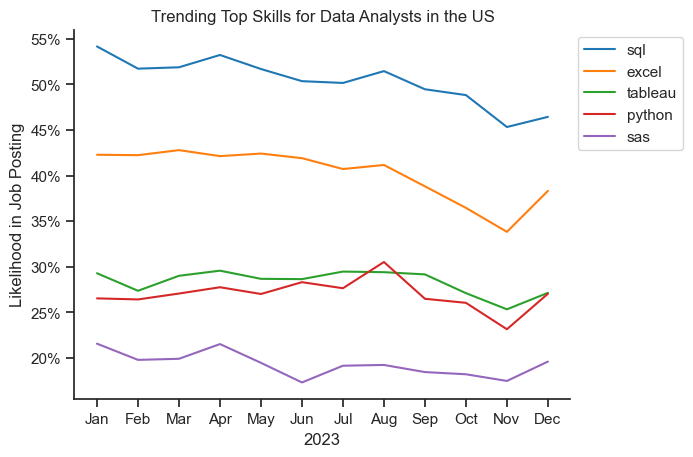

In [94]:
df_plot = df_DA_USA_perc.iloc[:, :5]

sns.lineplot(data = df_plot, dashes = False, palette = 'tab10')
sns.set_theme(style = 'ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in the US')
plt.xlabel('2023')
plt.ylabel('Likelihood in Job Posting')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.show()
